In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

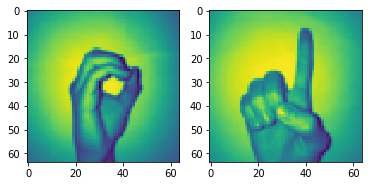

In [3]:
x1=np.load('X.npy')
Y1=np.load('Y.npy')
img_size=64
plt.subplot(1,2,1)
#sign zero is between image indexes 204 and 408
plt.imshow(x1[240].reshape(img_size,img_size))

#sign one is between image indexes 822 and 1027
plt.subplot(1,2,2)
plt.imshow(x1[840].reshape(img_size,img_size))


In [4]:
x=np.concatenate((x1[204:409],x1[822:1027]),axis=0)
zero=np.zeros(205)
one=np.ones(205)
y=np.concatenate((zero,one),axis=0).reshape(x.shape[0],1)

In [5]:
x.shape

(410, 64, 64)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=42)


In [7]:
x_train_flatten=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_flatten=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
print('x_train_flatten : ',x_train_flatten.shape)

x_train_flatten :  (348, 4096)


In [8]:
x_train=x_train_flatten.T
x_test=x_test_flatten.T
y_train=y_train.T
y_test=y_test.T

In [9]:
def init_weight_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

In [10]:
def sigmoid(z):
    y_cap=1/(1+np.exp(-z))
    return y_cap

y_cap=sigmoid(0)
y_cap

0.5

In [11]:
def forward_propagation(w,b,x_train,y_train):
    z=np.dot(w.T,x_train)+b
    y_cap=sigmoid(z)
    loss_f=-y_train*np.lod(y_cap)-(-1-y_cap) #loss function
    cost=(np.sum(loss))/x_train.shape[1]
    return cost

In [12]:
def forward_backward_propagation(w,b,x_train,y_train):
    #forward
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [13]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list